# EXERCICE 1 - PARTIE 2 : PYTHON
### 1) SANS PANDAS / SK

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([3,3,4,6])
Y = np.array([21, 32, 43, 54])
avg_x = np.mean(X)
avg_y = np.mean(Y)

ecart_type_x = np.std(X)
ecart_type_y = np.std(Y)

print(f"La moyenne de X est {avg_x}, La moyenne de Y est {avg_y}")
print(f"L'écart type de X est {ecart_type_x} et celui de Y est {ecart_type_y}")

La moyenne de X est 4.0, La moyenne de Y est 37.5
L'écart type de X est 1.224744871391589 et celui de Y est 12.298373876248844


In [3]:
X_std = (X - avg_x)/ecart_type_x
Y_std = (Y - avg_y)/ecart_type_y
X_std, Y_std

(array([-0.81649658, -0.81649658,  0.        ,  1.63299316]),
 array([-1.34164079, -0.4472136 ,  0.4472136 ,  1.34164079]))

In [4]:
#Cov matrix
cov_matrix = np.cov(X_std, Y_std)
cov_matrix

array([[1.33333333, 1.21716124],
       [1.21716124, 1.33333333]])

In [5]:
#Eigenvectors of each matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([2.55049457, 0.11617209]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [6]:
#Taux de variance expliqué
explained_variance = []
for i in eigenvalues:
    explained_variance.append((i/sum(eigenvalues))*100)
explained_variance

[95.64354645876384, 4.356453541236168]

In [7]:
#Standardize egeinvector U_n = U/||U||
U = eigenvectors
U_n = U/np.linalg.norm(U)
U_n

array([[ 0.5, -0.5],
       [ 0.5,  0.5]])

In [8]:
#Vectors projection
X_projected = np.dot(U_n, [X_std, Y_std])
X_projected 

array([[ 0.2625721 , -0.18464149, -0.2236068 ,  0.14567619],
       [-1.07906868, -0.63185509,  0.2236068 ,  1.48731697]])

### 2) AVEC SK

In [9]:
pca = PCA(n_components=2)
scaler = StandardScaler()
Z = scaler.fit_transform(np.vstack((X, Y)).T)

pca.fit(Z)
x_pca = pca.fit_transform(Z) #Projeter les données sur les composantes principales
pca.components_ #Composantes principales
pca.explained_variance_ #Taux de variance
pca.explained_variance_ratio_ #Taux de variance expliqué

print(f"Les composantes principales sont {pca.components_}")
print(f"Les taux de variance sont {pca.explained_variance_}")
print(f"Les taux de variance expliqué sont {pca.explained_variance_ratio_}")

Les composantes principales sont [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Les taux de variance sont [2.55049457 0.11617209]
Les taux de variance expliqué sont [0.95643546 0.04356454]


# EXERCICE 2

In [10]:
rng = np.random.RandomState(1)
data = (rng.rand(2,2)@rng.randn(2,200)).T
data

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

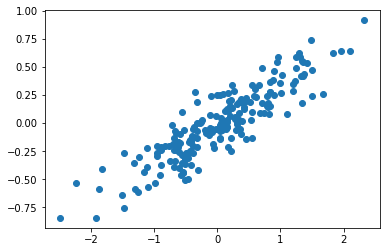

In [11]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [12]:
pca = PCA(n_components=2)
scaler = StandardScaler()
data_fit = scaler.fit(data)

pca.fit_transform(data_fit.transform(data))
print(f"Les composantes principales sont {pca.components_}")
print(f"Les taux de variance sont {pca.explained_variance_}")
print(f"Les taux de variance expliqué sont {pca.explained_variance_ratio_}")

Les composantes principales sont [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Les taux de variance sont [1.89888438 0.11116588]
Les taux de variance expliqué sont [0.94469498 0.05530502]


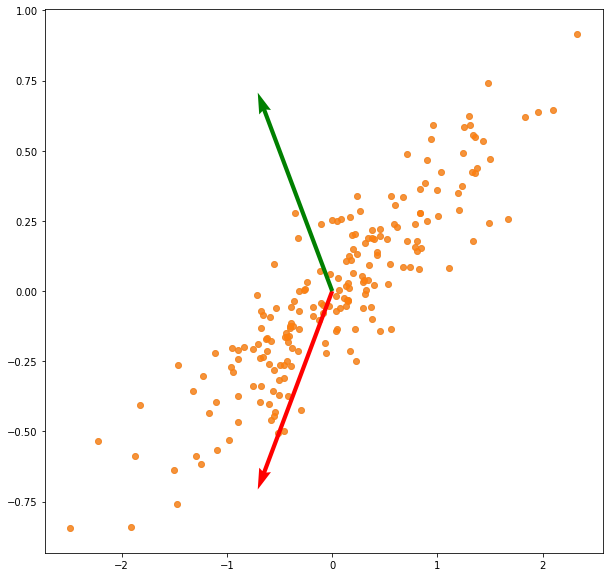

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
plt.scatter(pca.inverse_transform(pca.transform(data))[:, 0], pca.inverse_transform(pca.transform(data))[:, 1], alpha=0.8)
#plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1])
plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='Principal Component 1')
plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[1, 0], pca.components_[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Principal Component 2')

plt.show()

Les variances expliquées par les axes sont [1.89888438 0.11116588]
Les variances expliquées cumulées sont [1.89888438 2.01005025]


<BarContainer object of 2 artists>

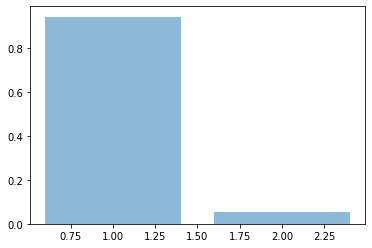

In [14]:

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Les variances expliquées par les axes sont {explained_variance}")
print(f"Les variances expliquées cumulées sont {np.cumsum(explained_variance)}")

plt.bar(range(1, len(explained_variance)+1), explained_variance_ratio, alpha=0.5, align='center', label='Explained variance')

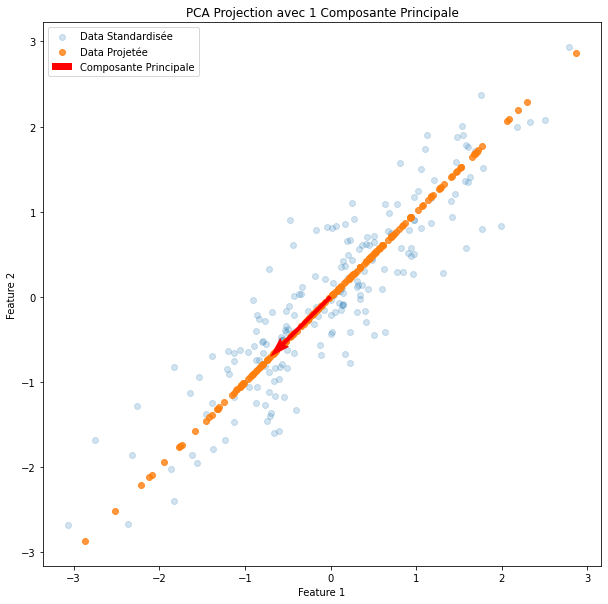

In [15]:
#. Visualiser sur un même graphique le nuage standardisé et le nouveau nuage projeté avec l’axe de composante principale
# Appliquez le PCA avec une composante principale
pca = PCA(n_components=1)
data_std = scaler.fit_transform(data)
principal_component = pca.fit_transform(data_std)
data_projected = pca.inverse_transform(principal_component)

# Visualisez les résultats
plt.figure(figsize=(10, 10))
plt.scatter(data_std[:, 0], data_std[:, 1], alpha=0.2, label='Data Standardisée')
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.8, label='Data Projetée')
plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='Composante Principale')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA Projection avec 1 Composante Principale')
plt.show()

# EXERCICE 3

### Étude 1 : Aperçu de l'ensemble de données et analyse descriptive

In [16]:
df_auto = pd.read_csv('data/auto.csv')
df_auto[:10]

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [17]:
#Add header
df_auto.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                   'drive-wheels', 'emplacement du moteur', 'empattement', 'longueur', 'largeur',
                   'hauteur', 'poids à vide', 'type de moteur', 'nombre de cylindres', 'taille du moteur', 'système de carburant',
                   'alésage', 'course', 'toux de compression', 'puissance', 'crème-rpm', 'ville-mpg', 'autoroute-mpg', 'prix']

df_auto[:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,toux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg,prix
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [18]:
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,toux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg,prix
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [19]:
df_auto.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,toux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg,prix
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [20]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              204 non-null    int64  
 1   normalized-losses      204 non-null    object 
 2   make                   204 non-null    object 
 3   fuel-type              204 non-null    object 
 4   aspiration             204 non-null    object 
 5   num-of-doors           204 non-null    object 
 6   body-style             204 non-null    object 
 7   drive-wheels           204 non-null    object 
 8   emplacement du moteur  204 non-null    object 
 9   empattement            204 non-null    float64
 10  longueur               204 non-null    float64
 11  largeur                204 non-null    float64
 12  hauteur                204 non-null    float64
 13  poids à vide           204 non-null    int64  
 14  type de moteur         204 non-null    object 
 15  nombre

In [21]:
df_auto.shape, df_auto.dtypes

((204, 26),
 symboling                  int64
 normalized-losses         object
 make                      object
 fuel-type                 object
 aspiration                object
 num-of-doors              object
 body-style                object
 drive-wheels              object
 emplacement du moteur     object
 empattement              float64
 longueur                 float64
 largeur                  float64
 hauteur                  float64
 poids à vide               int64
 type de moteur            object
 nombre de cylindres       object
 taille du moteur           int64
 système de carburant      object
 alésage                   object
 course                    object
 toux de compression      float64
 puissance                 object
 crème-rpm                 object
 ville-mpg                  int64
 autoroute-mpg              int64
 prix                      object
 dtype: object)

In [22]:
df_auto.describe(), df_auto.describe(include='object')

(        symboling  empattement    longueur     largeur     hauteur  \
 count  204.000000   204.000000  204.000000  204.000000  204.000000   
 mean     0.823529    98.806373  174.075000   65.916667   53.749020   
 std      1.239035     5.994144   12.362123    2.146716    2.424901   
 min     -2.000000    86.600000  141.100000   60.300000   47.800000   
 25%      0.000000    94.500000  166.300000   64.075000   52.000000   
 50%      1.000000    97.000000  173.200000   65.500000   54.100000   
 75%      2.000000   102.400000  183.200000   66.900000   55.500000   
 max      3.000000   120.900000  208.100000   72.300000   59.800000   
 
        poids à vide  taille du moteur  toux de compression   ville-mpg  \
 count    204.000000        204.000000           204.000000  204.000000   
 mean    2555.602941        126.892157            10.148137   25.240196   
 std      521.960820         41.744569             3.981000    6.551513   
 min     1488.000000         61.000000             7.000000

### Etape 2 : Prétraitement et nettoyage des données

In [23]:
df_auto.isna().sum()

symboling                0
normalized-losses        0
make                     0
fuel-type                0
aspiration               0
num-of-doors             0
body-style               0
drive-wheels             0
emplacement du moteur    0
empattement              0
longueur                 0
largeur                  0
hauteur                  0
poids à vide             0
type de moteur           0
nombre de cylindres      0
taille du moteur         0
système de carburant     0
alésage                  0
course                   0
toux de compression      0
puissance                0
crème-rpm                0
ville-mpg                0
autoroute-mpg            0
prix                     0
dtype: int64

In [24]:
df_auto.replace('?', np.nan, inplace=True)
df_auto.isna().sum()

symboling                 0
normalized-losses        40
make                      0
fuel-type                 0
aspiration                0
num-of-doors              2
body-style                0
drive-wheels              0
emplacement du moteur     0
empattement               0
longueur                  0
largeur                   0
hauteur                   0
poids à vide              0
type de moteur            0
nombre de cylindres       0
taille du moteur          0
système de carburant      0
alésage                   4
course                    4
toux de compression       0
puissance                 2
crème-rpm                 2
ville-mpg                 0
autoroute-mpg             0
prix                      4
dtype: int64

In [25]:
df_auto.duplicated().sum()

0

In [26]:
df_auto.drop_duplicates(inplace=True)

In [27]:
round(df_auto.isna().sum() / df_auto.size * 100, 1) #Percentage of missing values

symboling                0.0
normalized-losses        0.8
make                     0.0
fuel-type                0.0
aspiration               0.0
num-of-doors             0.0
body-style               0.0
drive-wheels             0.0
emplacement du moteur    0.0
empattement              0.0
longueur                 0.0
largeur                  0.0
hauteur                  0.0
poids à vide             0.0
type de moteur           0.0
nombre de cylindres      0.0
taille du moteur         0.0
système de carburant     0.0
alésage                  0.1
course                   0.1
toux de compression      0.0
puissance                0.0
crème-rpm                0.0
ville-mpg                0.0
autoroute-mpg            0.0
prix                     0.1
dtype: float64

In [28]:
df_auto.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [29]:
df_auto.dtypes.value_counts()

object     16
int64       5
float64     5
Name: count, dtype: int64

In [30]:
threshold = df_auto.shape[0] * 0.85
df_cleaned = df_auto.dropna(thresh=threshold, axis=1)
if 'normalized-losses' not in df_cleaned.columns:
    print("La colonne 'normalized-losses' a été supprimée.")
else:
    print("La colonne 'normalized-losses' est toujours présente.")

df_cleaned.head()

La colonne 'normalized-losses' a été supprimée.


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,longueur,...,taille du moteur,système de carburant,alésage,course,toux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg,prix
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [32]:
# Convertir d'object à float64 plusieurs colonnes
# Remplacer les valeurs non numériques par NaN
cols_to_convert = ['alésage', 'course', 'puissance', 'crème-rpm']
for col in cols_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Convertir les colonnes en float64
df_cleaned[cols_to_convert] = df_cleaned[cols_to_convert].astype('float64')

# Remplacer les valeurs manquantes par la moyenne des colonnes
df_cleaned[cols_to_convert] = df_cleaned[cols_to_convert].apply(lambda x: x.fillna(x.mean()))

df_cleaned.dtypes.value_counts()

C:\Users\jgoth\AppData\Local\Temp\ipykernel_26984\3625829503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
C:\Users\jgoth\AppData\Local\Temp\ipykernel_26984\3625829503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[cols_to_convert] = df_cleaned[cols_to_convert].astype('float64')
C:\Users\jgoth\AppData\Local\Temp\ipykernel_26984\3625829503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

object     11
float64     9
int64       5
Name: count, dtype: int64

In [33]:
df_cleaned["num-of-doors"].fillna('four')

0       two
1       two
2      four
3      four
4       two
       ... 
199    four
200    four
201    four
202    four
203    four
Name: num-of-doors, Length: 204, dtype: object

In [43]:
df_cleaned.dropna(inplace=True)
df_cleaned.dtypes

C:\Users\jgoth\AppData\Local\Temp\ipykernel_26984\3953776671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


symboling                  int64
make                      object
fuel-type                 object
aspiration                object
num-of-doors              object
body-style                object
drive-wheels              object
emplacement du moteur     object
empattement              float64
longueur                 float64
largeur                  float64
hauteur                  float64
poids à vide               int64
type de moteur            object
nombre de cylindres       object
taille du moteur           int64
système de carburant      object
alésage                  float64
course                   float64
toux de compression      float64
puissance                float64
crème-rpm                float64
ville-mpg                  int64
autoroute-mpg              int64
prix                      object
dtype: object

In [42]:
df_cleaned.dtypes
#Selectionner les colonnes en int
df_num = df_cleaned.select_dtypes(include=['int64', 'float64'])
df_num.head()

,symboling,empattement,longueur,largeur,hauteur,poids à vide,taille du moteur,alésage,course,toux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
2,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
3,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
4,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25


In [48]:
#Coeficient de correlation
correlation = df_num.corr()
correlation

,symboling,empattement,longueur,largeur,hauteur,poids à vide,taille du moteur,alésage,course,toux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg
symboling,1.000000,-0.530189,-0.364852,-0.236549,-0.542687,-0.235597,-0.112266,-0.144934,0.009203,-0.174906,0.071407,0.281675,-0.024608,0.047250
empattement,-0.530189,1.000000,0.879087,0.814018,0.582502,0.787067,0.575564,0.499330,0.146941,0.254169,0.377106,-0.363797,-0.485118,-0.557450
longueur,-0.364852,0.879087,1.000000,0.856526,0.488003,0.882084,0.685155,0.607798,0.123927,0.155093,0.586394,-0.282309,-0.679599,-0.711718
largeur,-0.236549,0.814018,0.856526,1.000000,0.295840,0.868037,0.730675,0.545813,0.185024,0.186687,0.621866,-0.243575,-0.647907,-0.694274
hauteur,-0.542687,0.582502,0.488003,0.295840,1.000000,0.308923,0.072576,0.181343,-0.080338,0.252216,-0.083091,-0.310079,-0.065064,-0.119573
poids à vide,-0.235597,0.787067,0.882084,0.868037,0.308923,1.000000,0.848719,0.643817,0.170989,0.162067,0.759935,-0.279178,-0.755671,-0.800700
taille du moteur,-0.112266,0.575564,0.685155,0.730675,0.072576,0.848719,1.000000,0.571686,0.210281,0.029456,0.825267,-0.255826,-0.656191,-0.684850
alésage,-0.144934,0.499330,0.607798,0.545813,0.181343,0.643817,0.571686,1.000000,-0.049413,-0.005159,0.571251,-0.263410,-0.590356,-0.599194
course,0.009203,0.146941,0.123927,0.185024,-0.080338,0.170989,0.210281,-0.049413,1.000000,0.186556,0.103670,-0.065963,-0.044042,-0.043775
toux de compression,-0.174906,0.254169,0.155093,0.186687,0.252216,0.162067,0.029456,-0.005159,0.186556,1.000000,-0.203680,-0.431264,0.314224,0.249715


In [49]:
correlation_pairs = correlation.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort", key=abs, ascending=False)
most_correlated_pairs = sorted_pairs[sorted_pairs != 1].drop_duplicates()
print(most_correlated_pairs)

autoroute-mpg        ville-mpg           0.971642
longueur             poids à vide        0.882084
empattement          longueur            0.879087
poids à vide         largeur             0.868037
largeur              longueur            0.856526
                                           ...   
course               autoroute-mpg      -0.043775
toux de compression  taille du moteur    0.029456
ville-mpg            symboling          -0.024608
symboling            course              0.009203
toux de compression  alésage            -0.005159
Length: 91, dtype: float64


In [53]:
X = df_cleaned[['longueur', 'largeur', 'hauteur', 'prix']]
scaler = StandardScaler()
#Standardize the data
X_std = scaler.fit_transform(X)
X_std[:5]

array([[-0.44617283, -0.85877404, -2.06490371,  0.40843934],
       [-0.2513182 , -0.19289386, -0.57787263,  0.40843934],
       [ 0.18710474,  0.14004623,  0.20694933,  0.08882336],
       [ 0.18710474,  0.23517197,  0.20694933,  0.52751196],
       [ 0.24393734,  0.1876091 , -0.2887277 ,  0.25176484]])

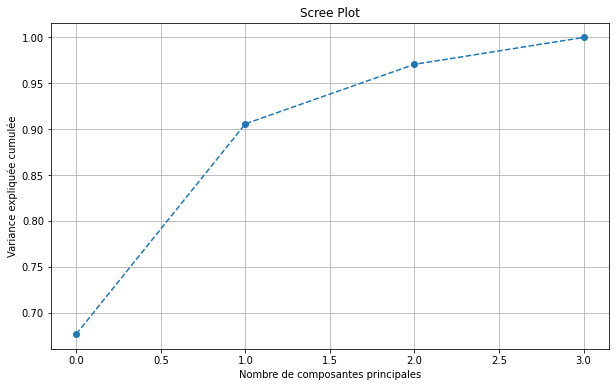

In [59]:
pca = PCA()
pca.fit(X_std)

explained_variance = pca.explained_variance_ratio_
explained_variance

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [61]:
pca_2n = PCA(n_components=2)
X_pca = pca_2n.fit_transform(X_std)
X_projected = pca_2n.inverse_transform(X_pca)

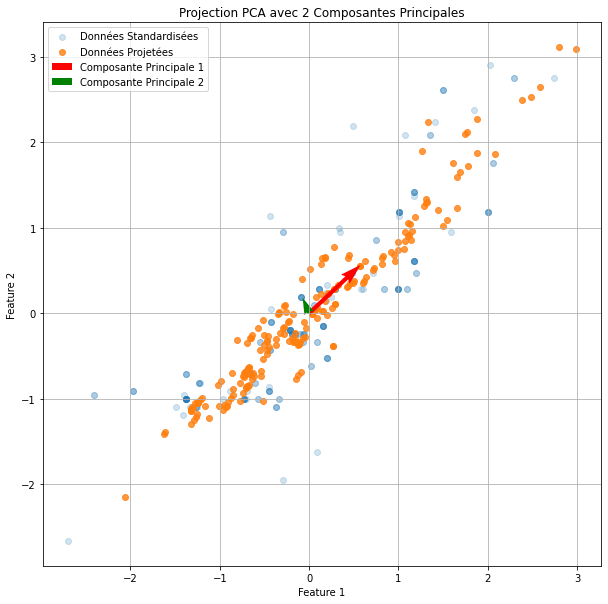

In [62]:
# Afficher les résultats
plt.figure(figsize=(10, 10))
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2, label='Données Standardisées')
plt.scatter(X_projected[:, 0], X_projected[:, 1], alpha=0.8, label='Données Projetées')
plt.quiver(pca_2n.mean_[0], pca_2n.mean_[1], pca_2n.components_[0, 0], pca_2n.components_[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='Composante Principale 1')
plt.quiver(pca_2n.mean_[0], pca_2n.mean_[1], pca_2n.components_[1, 0], pca_2n.components_[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Composante Principale 2')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Projection PCA avec 2 Composantes Principales')
plt.grid(True)
plt.show()

Le modèle a bien appris et à réduit les dimensions du df de base.
Ainsi, le PCA a crée de nouvelles composantes principales.